# Eric Tarr's [Analog Circuit Modeling Worskshop](https://www.patreon.com/posts/audio-circuit-46328180)
Feb 6-7 2021

Notes by Scott H. Hawley, [@drscotthawley](https://twitter.com/drscotthawley)

Electrosmash's Tube Screamer Analysis: https://www.electrosmash.com/tube-screamer-analysis

GitHub repo for TS Pedal: https://github.com/erictarrbelmont/TSPedal

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Fs = 48000
Ts = 1/Fs
f = 3
t = np.arange(0,1,step=Ts)
x = np.sin(2*np.pi*f*t)
N = len(x)

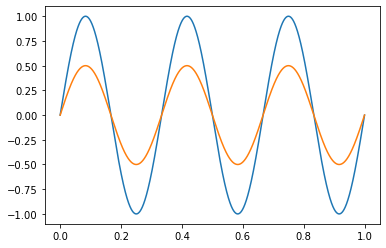

In [2]:
g = 0.5
y = g * x

plt.plot(t,x)
plt.plot(t,y)

....not taking notes on basic circuit theory

**Definition:** For series circuit with resistors $R_1$ and $R_2$, with supply voltage $V_{in}$, and regarding the voltage across $R_2$ (=$V_{R_2}$) as $V_{out}$, the **transfer function** is

$$ {V_{out} \over V_{in}} = {R_1 \over R_1 + R_2} \equiv g$$
where $g$ is also called the "gain"

In [3]:
R1 = 1
R2 = 2
g = R1 / (R1 + R2)
print(g)

0.3333333333333333


**Schematic diagrams**: Let's try to draw schematics too.  Looks like we can only use an older version of SchemDraw on Colab.
So...here are the [Docs for old SchemDraw, v0.6](https://schemdraw.readthedocs.io/en/0.6.0/). 

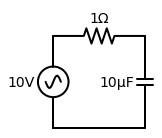

In [7]:
import schemdraw as schem
import schemdraw.elements as elm

d = schem.Drawing()
d += elm.Resistor().right().label('1Ω')
d += elm.Capacitor().down().label('10μF')
d += elm.Line().left()
d += elm.SourceSin().up().label('10V')
d.draw()

Ok, that can work.  See [SchemDraw Circuit Gallery](https://schemdraw.readthedocs.io/en/0.6.0/gallery/gallery.html) for more complicated examples.  It's also possible to [hide the code cells in Colab](https://stackoverflow.com/questions/49090476/how-can-i-hide-cell-contents-in-google-colaboratory), so I might do some of that when generating schematics.

 Catching up to Eric...

In [8]:
# linear potentiometer
alpha = 0.5
R1 = 1000 + (1-alpha)*1000
R2 = alpha *1000

def calc_g(R1, R2):
    return R1 / (R1 + R2)

print(calc_g(R1,R2))

0.75


...kept messing around with drawing circuits and it slowed me down.  Eric is now doing Nodal Analysis & KCL...

## Active Circuits




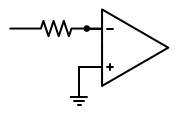

In [35]:
#@title Inverting Amplifier
d = schem.Drawing()
op = elm.Opamp()
d += op
d += elm.Line().left().at(op.in2).length(d.unit/4)
d += elm.Line().down().length(d.unit/5)
d += elm.Ground()
d += elm.Line().left().at(op.in1).length(d.unit/6)
d += elm.Dot()
d.push()
Rin = elm.Resistor().left().at(op.in1)
d+= Rin
#Rin = d.add(elm.RES, d='left', xy=op.in1-[d.unit/5,0], botlabel='$R_1$', lftlabel='$v_{in}$')
#d.pop()
#d.add(elm.LINE, d='up', l=d.unit/2)
#Rf = d.add(elm.RES,  d='right', l=d.unit*1, label='$R_2$')
#d.add(elm.LINE, d='down', toy=op.out)
#d.add(elm.DOT)
#d.add(elm.LINE, d='left', tox=op.out)
#d.add(elm.LINE, d='right', l=d.unit/4, rgtlabel='$v_{o}$')
d.draw()

$${V_{out}\over V_{in}} = - {R_2\over R_1}$$


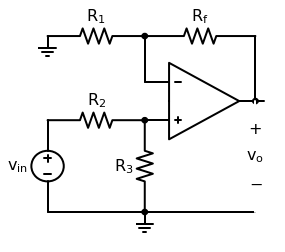

In [ ]:
#@title Non-inverting Amp Schematic
d = schem.Drawing()
op = d.add(elm.OPAMP)
d.add(elm.LINE, xy=op.out, l=.75)
d.add(elm.LINE, xy=op.in1, d='left', l=.75)
d.add(elm.LINE, d='up', l=1.5)
d.add(elm.DOT)
R1 = d.add(elm.RES, d='left', label='$R_1$')
d.add(elm.GND)
Rf = d.add(elm.RES, d='right', xy=R1.start, tox=op.out+.5, label='$R_f$')
d.add(elm.LINE, d='down', toy=op.out)
dot = d.add(elm.DOT)
d.add(elm.LINE, d='left', xy=op.in2, l=.75)
d.add(elm.DOT)
R3 = d.add(elm.RES, d='down', label='$R_3$')
d.add(elm.DOT)
d.add(elm.GND)
R2 = d.add(elm.RES, d='left', xy=R3.start, label='$R_2$')
d.add(elm.SOURCE_V, d='down', reverse=True, label='$v_{in}$')
d.add(elm.LINE, d='right', tox=Rf.end)
d.add(elm.GAP_LABEL, d='down', xy=dot.start, toy=R3.end, label=['+','$v_o$','$-$'])
d.draw()

^^ Uhh... that schematic I just grabbed from SchemDraw gallery. It doesn't look like the one Eric drew, and variable numbers are different.

Eric's expression:
$${V_{out}\over V_{in}} = 1 + {R_2\over R_1}$$

# Filtering

```
y[n] = 0.5*x[n] + 0.5*x[n-1]
     = b_0*x[n] + b_1*x[n-1]
```

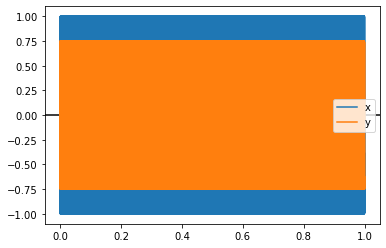

In [12]:
# basicFilter
import scipy.signal as signal
Fs = 48000
Ts = 1/Fs
f = 11000
t = np.arange(0,1,step=Ts)
x = np.sin(2*np.pi*f*t)

# Filter coefficients
b0, b1 = 0.5, 0.5

N = len(x)
y = 0*x
s1 = 0
for n in range(N):
    y[n] = b0*x[n] + b1 * s1
    s1 = x[n]


# Waveform graph
def waveform(t,x,y):
    plt.axhline(color='black')
    plt.plot(t,x, label='x')
    plt.plot(t,y, label='y')
    plt.legend()
    plt.show()

waveform(t,x,y)

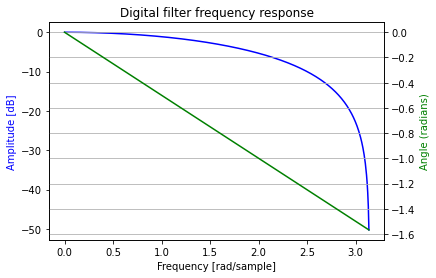

In [13]:
# quick re-do of the MATLAB freqz function that we can call in the future
def freqz(b):
    # can also call this is as freqz(V)
    w, h = signal.freqz(b)
    fig, ax1 = plt.subplots()
    ax1.set_title('Digital filter frequency response')

    ax1.plot(w, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency [rad/sample]')

    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')
    plt.show()

freqz([b0,b1])

# Discrete Kirchoff Method
*Hawley: There are at least three (isomorphic) ways to view what Eric is doing in this section. I am going to give my "take" in what follows; just know that this is not exactly they way Eric said it.  Also present are differences in terminology from my "physicist" background and that of EE / signal processing, so e.g., hen Eric says "Nodal analysis," I think "Kirchoff's Junction Rule".  We're going to make heavy use of the Junction Rule when analyzing circuits.*

Forget about everything prior to this about Laplace transforms and z-transforms. We're not going to use any of it and could have skipped it entirely had it not been for a desire to mention various approaches to circuit analysis. Instead we're going to direcly simulate the movement of charge in the time domain, using finite difference techniques.

Often one writes the relationshio between voltage $V$ across and current $i$ through a capacitor $C$ as 
$$ i(t) = C {d V(t) \over dt} $$
(Note that this is just the time derivative of the charge $Q$ on a constant-valued capacitor, $Q=CV$.)
If we use a second-order-accurate finite difference approximation (or as Eric says, the trapezoidal rule for integration) on the discrete domain $t=nT_s$ (where $n$ is the time-step index), centered around the "in between" time step $n-1/2$, then our equation for the current becomes

$${i[n] + i[n-1]\over 2} = C {V[n] - V[n-1]\over T_s}.$$
Or, solving for $i[n]$,

$$i[n] = i[n-1] + {V[n] - V[n-1]\over (T_s / 2C)} .$$
Remembering Ohm's Law, ($i=V/R$), we can view the $T_s/2C$ as a kind of resistance, which we call $R_1$. 
Then we can write

$$i[n] = {V[n]\over R_1} - \left({V[n-1]\over R_1} - i[n-1]\right)$$
and regard everything in the parenthesis, which depends on the earlier time step, as part of a "state" denoted by $X[n-1]$:

From this we arrive at a key equation,
$$ \boxed{ i[n] = {V[n]\over R_1} - X[n-1] }$$

**Key insight**: This equation can be viewed as the sum of currents in a parallel (sub-)circuit, where one branch has a resistor $R_1$ and the other branch has a "backwards" current $X[n-1]$.  Thus wherever we wish to simulate a capacitor, we will replace it with the parallel combination of a resistor (of resistance $R_1=T_s/2C$) and a backwards current $X[n-1]$.

To really understand how to use this, we need to apply it to example circuits.  

*Additional note from Hawley: We will always start our simulations from the initial condition of an uncharged capacitor, for which the charge and voltage are both zero.*


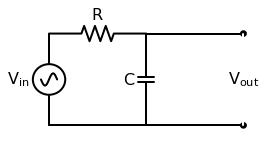

In [ ]:
#@title Example: Low-Pass Filter
# trying to build the schematic... fow now just pasting boilerplate circuit from SchemDraw
d = schem.Drawing()
d.add(elm.RES, d='right', label='$R$')
C = d.add(elm.CAP, d='down', label='$C$')
d.add(elm.LINE, d='left')
d.add(elm.SOURCE_SIN, d='up', label='$V_{in}$')
d.add(elm.LINE, xy=C.start, d='right')
top = d.add(elm.DOT, label='')
d.add(elm.LINE, xy=C.end, d='right')
d.add(elm.DOT, label='')
d.add(elm.GAP, xy=top.start, d='down', label="$V_{out}$")
d.draw()

Let's go back to our basic series RC lowpass filter.  (Where $V_{out}$ is measured across the capacitor).  Where the resistor is $R_2$ an the capacitor is $C$.

Anywhere we see the capacitor, we'll replace it with two parallel paths, one side with a new resistor $R_1$ and the other side with a current source as $X_1$.



In [ ]:
# TODO: draw new schematic here

Associate the resistor $R_1$ as...

$$R_1 = {T_s\over 2C}$$

(Normally I (Scott) would say 
$$ V_{out} = V_C = I X_C$$ where $X_C = 1/2\pi f$.)

Current going into capacitor is (by Kirchoff's Junction Rule):

$$ {V_{in}-V_{out}\over R_2} = {V_{out}\over R_1} - X_1$$

where $X_1$ is the "reverse current source."  Now get all the $V_{out}$'s together:

$${V_{in}\over R_2} + X_1 = V_{out}\left({1\over R_1} + {1\over R_2}\right) $$

Let 
$$ G \equiv \left({1\over R_1} + {1\over R_2}\right) $$

Then 

$$ V_{out} = {V_{in}\over G R_2} + {X_1\over G}$$

and 
$$X_1[n] = {2\over R_1}V_{out} - X_1[n-1].$$
^^ where that equation for updating $X$ came earlier:
$$ X[n-1] =...argh\ lost\ it$$


In [ ]:
# rcDKMethod.m
Fs = 48000
Ts = 1.0/Fs

# components
C1 = 82e-12
R1 = Ts/(2*C1)
R2 = 240e3

G = (1/R1 + 1/R2)

fc = 1/(2*np.pi*R2*C1)
print(fc)

#impulse
Vi = np.zeros(2048)
Vi[0] = 1
N = len(Vi)

# Filter coefficients
b0, b1 = 1/(G*R2),  1/G

8087.141417271104


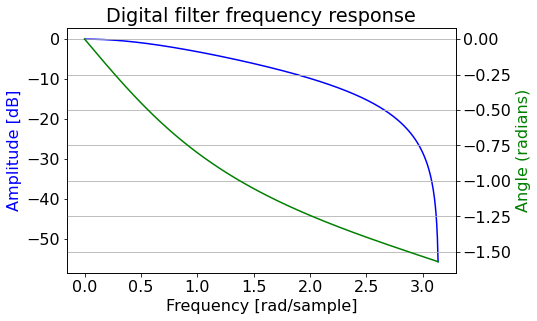

In [ ]:
Vo = np.zeros(N)
x1 = 0
for n in range(N):
    Vo[n] = b0 * Vi[n] + b1 * x1
    x1 = (2 / R1) * Vo[n] - x1

freqz(Vo)

## Example: HPF


In [ ]:
# missed it

## Example: Digitizing a 2nd Order ..Low Pass Filter 





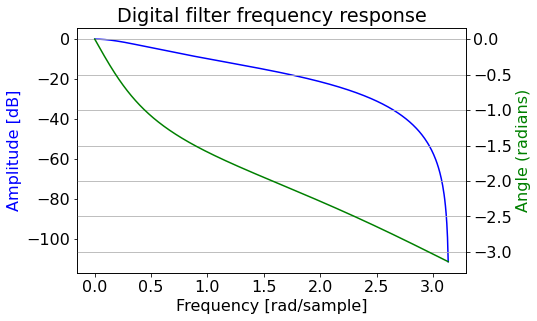

In [ ]:
# DKrc2ndOrder.m
# Digitizing a 2nd-order RC Filter

# Low-pass Filter
Fs = 48000 
Ts = 1/Fs

# Components
C1 = 82e-12
R1 = Ts/(2*C1)
R2 = R1
R3 = 240e3
R4 = R3

fc = 1/(2*np.pi*R2*C1)

Vi = np.zeros(2048)
Vi[0] = 1        # impulse
N = len(Vi)
Vo = 0*Vi

Gx = (1/R1 + 1/R3 + 1/R4)
Go = ((R4+R2)/R2)

# Filter coefficients
a0 = Go - 1/(R4*Gx)
b0 = 1/(R3 * Gx * a0)
b1 = 1/(Gx * a0)
b2 = R4/a0

# States
x1 = 0
x2 = 0

for n in range(N):
    Vo[n] = b0 * Vi[n] + b1 * x1 + b2 * x2
    Vx = Vo[n] * Go - R4*x2
    x1 = (2/R1) * Vx - x1
    x2 = (2/R2) * Vo[n] - x2

freqz(Vo)

# Tube Screamer.

Let's focus on the [Tone/Volume stage](https://www.electrosmash.com/tube-screamer-analysis#tone-stage). 
We will ignore the 4.5V DC offset and the resistor R9.

![tone/volume section](https://www.electrosmash.com/images/tech/tube-screamer/tube-screamer-tone-volume.png)

Electrosmash discusses [extreme settings of pot P2](https://www.electrosmash.com/tube-screamer-analysis#tone), but we will include P2 & associated R-C elements twice, i.e. on each "branch" of the op-amp, but not connected together:

(note Eric's resistor numbers don't always match Electrosmash's numbering)
![circuit diagram](https://i.imgur.com/DZwyOvh.png)


# Day 2 - Diodes, Distortion, and More

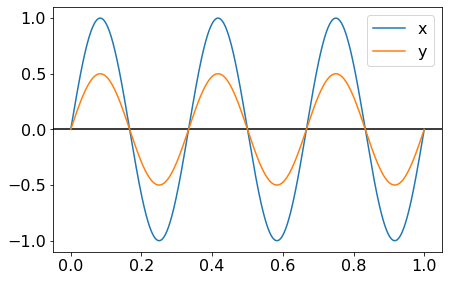

In [ ]:
## digitalDistortion

Fs = 48000
Ts = 1/Fs
f = 3
t = np.arange(0,1,step=Ts)
x = np.sin(2*np.pi*f*t)
g = 0.5

y = g*x 

waveform(t,x,y)

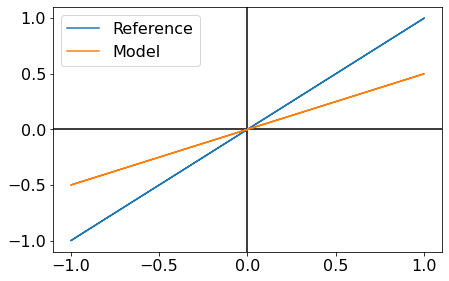

In [ ]:
# Characteristic Curve: Output vs. Input
def char_curve(x,y):
    plt.axvline(color='black')
    plt.axhline(color='black')
    plt.plot(x,x, label='Reference')
    plt.plot(x,y, label='Model')
    plt.legend()
    plt.show()

char_curve(x,y)

24001 12001


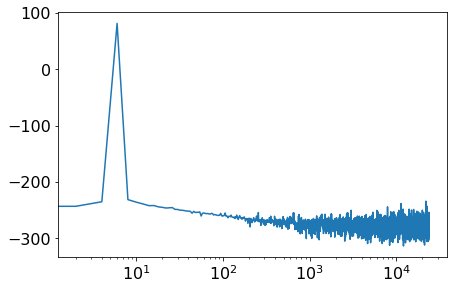

In [ ]:
# Total Harmonic Distortion plot
def thd(y, Ts=1/48000):
    mag = np.absolute(np.fft.rfft(y))
    freqs = np.fft.rfftfreq(mag.size, d=Ts)
    print(mag.size, freqs.size)
    plt.semilogx(freqs,20*np.log10(mag[0:len(mag)//2+1]))   # the //2+1 is to stop at nyquist
    plt.show()

thd(y)

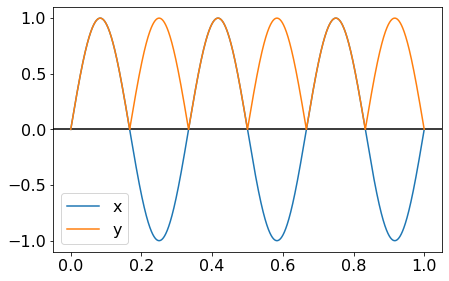

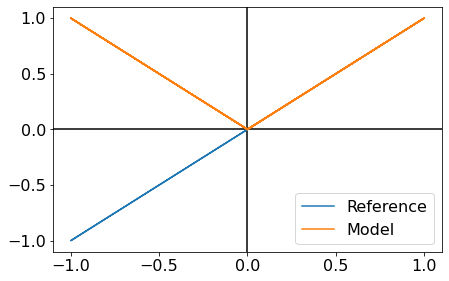

24001 12001


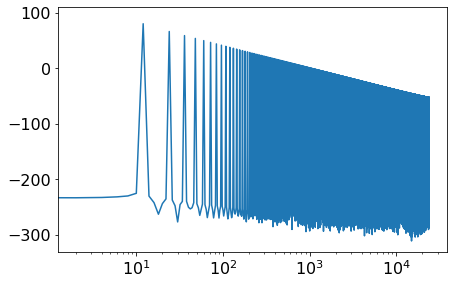

In [ ]:
# Full wave rectifier:
y = np.abs(x)

waveform(t,x,y)
char_curve(x,y)
thd(y)

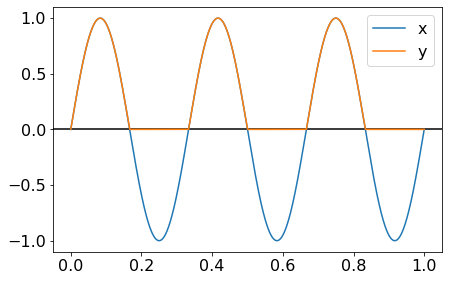

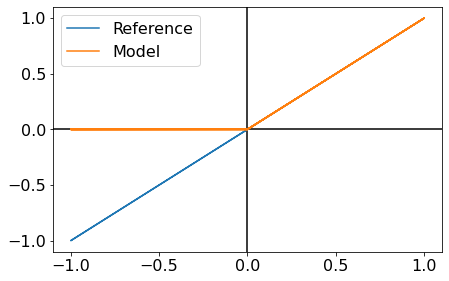

24001 12001


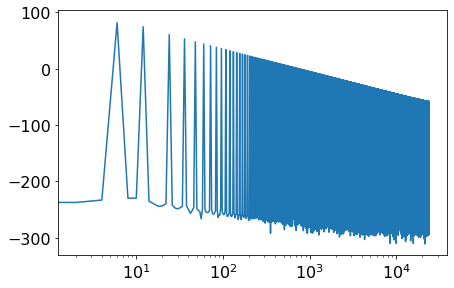

In [ ]:
# Half-wave rectifier ("ReLU" in machine learning)
def relu(x):
    return x * (x > 0)
y = relu(x)

waveform(t,x,y)
char_curve(x,y)
thd(y)

## Digital Distortion Methods

**Hard Clipping:**

**Softer Clipping:**

**Cubic Distortion:**

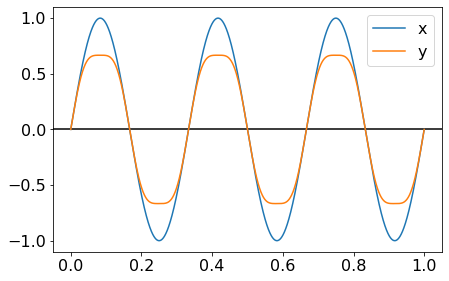

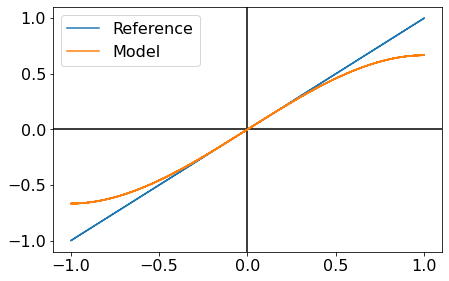

24001 12001


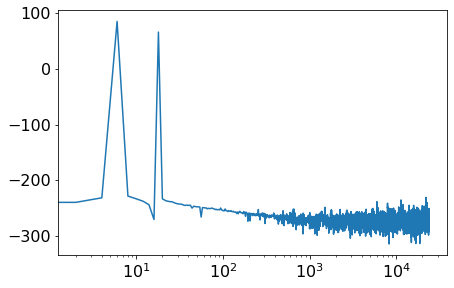

In [ ]:
#cubic distortion:
def cube_dist(x):
    return x - 1/3* x**3

y = cube_dist(x)
waveform(t,x,y)
char_curve(x,y)
thd(y)

**Arctan Distortion:**

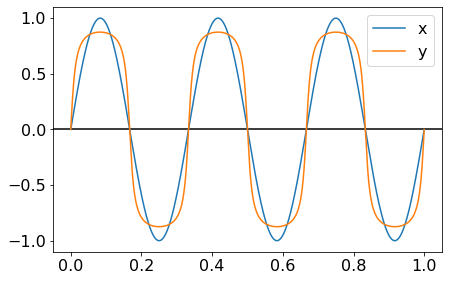

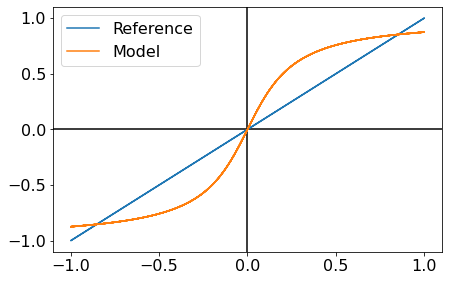

24001 12001


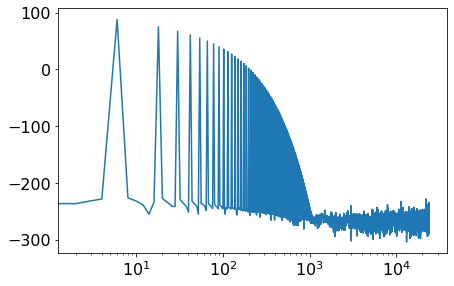

In [ ]:
# Arctan distortion
def atan_dist(x, alpha=5):
    return np.arctan(alpha*x)*(2/np.pi)

y = atan_dist(x)
waveform(t,x,y)
char_curve(x,y)
thd(y)

"DC Sweep" and characteristic curve are basically the same...?

## Analog Diode Modeling

...basic intro material on diodes...

Recommended textbook: <u>Microelectronic Circuits</u> by Sedra & Smith, Oxford Press

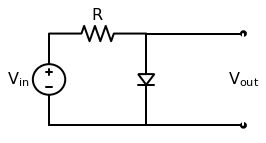

In [ ]:
#@title Example: Diode Circuit
# trying to build the schematic... fow now just pasting boilerplate circuit from SchemDraw
d = schem.Drawing()
d.add(elm.RES, d='right', label='$R$')
C = d.add(elm.DIODE, d='down', label='')
d.add(elm.LINE, d='left')
d.add(elm.SOURCE_V, d='up', label='$V_{in}$')
d.add(elm.LINE, xy=C.start, d='right')
top = d.add(elm.DOT, label='')
d.add(elm.LINE, xy=C.end, d='right')
d.add(elm.DOT, label='')
d.add(elm.GAP, xy=top.start, d='down', label="$V_{out}$")
d.draw()

## Shockley Diode Equation

$$ i = I_s \left(  e^{V_o \over \eta V_T} -1 \right)  $$
where  

* $I_s$ = saturation current. Describes "leaky aspect" of curve
* $V_T$ = thermal voltage, depends on the material
* $\eta$ = emission coefficient or "quality factor", usually between 1 and 2.  1 = "ideal"

Note that $V_T$ not where diode "turns on": For silicon, diode turns on around 0.7 V, whereas for germanium, it's 0.3 V. 


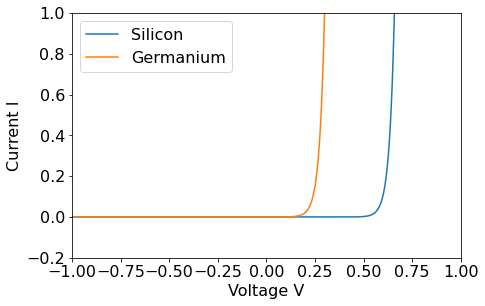

In [ ]:
# diodeEquation

# DC Sweep
x = np.arange(-1,1,step=0.0001)

# Diode Coeffs
Is_s = 10e-12 # Silicon
eta_s = 1
Vt = 0.026

Is_g = 10e-6 # Germanium
eta_g = 1

# Output Current 
y_s = Is_s * (np.exp(x/(eta_s*Vt)) -1)
y_g = Is_g * (np.exp(x/(eta_g*Vt)) -1)

plt.plot(x,y_s, label='Silicon')
plt.plot(x,y_g, label='Germanium')
plt.xlabel('Voltage V')
plt.ylabel('Current I')
plt.xlim([-1,1])
plt.ylim([-0.2,1])
plt.legend()

Notice that for the two curves above, both  $V_T$ and $\eta$ were the same, only the saturation current differed. And yet that changed where the diode turned on. 

Let's put a resistor and a diode in a circuit in series with a voltage source, and consider...

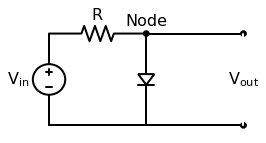

In [ ]:
#@title Example: Diode Circuit
# trying to build the schematic... fow now just pasting boilerplate circuit from SchemDraw
d = schem.Drawing()
d.add(elm.RES, d='right', label='$R$')
d.add(elm.DOT, label='Node')
C = d.add(elm.DIODE, d='down', label='')
d.add(elm.LINE, d='left')
d.add(elm.SOURCE_V, d='up', label='$V_{in}$')
d.add(elm.LINE, xy=C.start, d='right')
top = d.add(elm.DOT, label='')
d.add(elm.LINE, xy=C.end, d='right')
d.add(elm.DOT, label='')
d.add(elm.GAP, xy=top.start, d='down', label="$V_{out}$")
d.draw()



At that top node where R and the diode intersect...

$$ {Vi-Vo\over R} = I_s \left(e^{Vo\over \eta V_T}-1\right) $$

Isolate $V_o$ for differential equation:

$${V_i \over R} = {V_o\over R}+ I_s \left(e^{Vo\over \eta V_T}-1\right)$$
no way factor out $V_o$ (it's an implicit transcendental equation), so how to find $V_o$? 

We're going to approximate the solution numerically using the  Newton-Rhapson method aka Newton's Method. 



## Netwon-Rhapson Method

(Ok, I know a fair amount about this so I'm going to grab coffee for a bit...)

*(BTW, one of my favorite Newton's Method application/story/trivia items is the Fast Inverse Square root algorithm pioneered by John Carmack of Id Software back in the 90s. It's what allowed the video game DOOM to run fast when doing texture-mapping.  Instead of computing 1/sqrt(x), they took a very specific guess that involved some bit arithmetic, and then two (or maybe one?) Newton iterations and boom, done.  Full story: https://medium.com/hard-mode/the-legendary-fast-inverse-square-root-e51fee3b49d9)*

For the initial guess, you can either choose 0, or you can use the value from the previous time step. 


In [ ]:
# Solving diode eq with Newton
Is = 10e-6
eta = 1.5
Vt = 0.0254

x = 1e-2  # initial guess 
maxiter = 10  # note "iter" is a command in Python; you can overload it, but..nah
thr = 1e-8    # stopping criterion 
i = 0
fx = Is * (np.exp(x/(eta*Vt))-1)

while (i < maxiter) and (abs(fx)>thr):
    fx = Is * (np.exp(x/(eta*Vt))-1)
    fprime = Is/(eta*Vt)*np.exp(x/(eta*Vt))
    x = x - fx/fprime 
    print(i,x,fx,fprime)
    i = i+1



0 0.0012046759061692964 3.0013381215995952e-06 0.00034124247038319155
1 1.8846045379533778e-05 3.2123974514875366e-07 0.000270898680975033
2 4.66030015546667e-09 4.947692182872832e-09 0.0002625970522882644


Revisiting our circuit...

$$ {V_i - V_o \over R} = I_s \left(e^{V_o\over \eta V_T}-1\right) $$

f(x):
$$ 0 = {V_o \over R} + I_s \left(e^{V_o\over \eta V_T}-1\right) - {V_i \over R}$$

df/dVo:
$$  {1 \over R} + {I_s\over\eta V_T} e^{V_o\over \eta V_T}$$

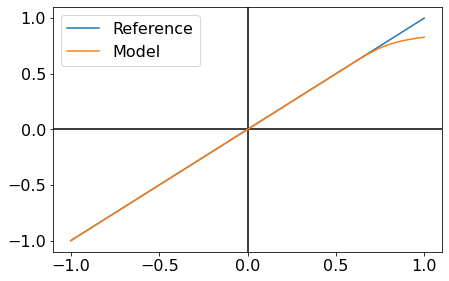

In [ ]:
# diodeResistor.m
Vi = np.arange(-1,1,step=0.001)
Is = 1e-12
eta = 1.68
Vt = 0.026

R = 1000  # 1k

thr = 1e-7

N = len(Vi)

x = 0 
maxiter = 30

Vo = 0*Vi
for n in range(N):
    i = 1
    fx = x/R + Is*(np.exp(x/(eta*Vt))-1) - Vi[n]/R

    while (i < maxiter) and (abs(fx)>thr):
        dfdx = 1/R + Is/(eta*Vt)*np.exp(x/(eta*Vt))
        x = x - fx/dfdx
        i += 1
        #print(i,x,fx)
        fx = x/R + Is*(np.exp(x/(eta*Vt))-1) - Vi[n]/R
    Vo[n] = x   # reuse x as guess for next sample 

char_curve(Vi,Vo)

Then we reversed the direction of the diode, this introduced a minus sign in the math, and cause the characteristic curve to clip on the bottom instead of the top. 

## Two identical diodes together
...in reversed directions:

You'll get a +Vo and -Vo and exponent terms, allowing you to use a sinh() function, the derivative of which is a cosh() function 

And if you have two diodes in series, you can replace $\eta V_T$ with a $2\eta V_T$... so you can do two diodes on one branch and one diode on the other to get "asymmetrical distortion". 


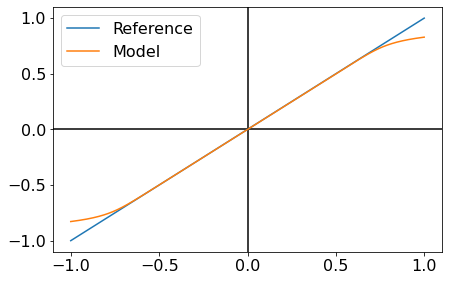

In [ ]:
 # diodeResistor.m
Vi = np.arange(-1,1,step=0.001)
Is = 1e-12
eta = 1.68
Vt = 0.026

R = 1000  # 1k

thr = 1e-7

N = len(Vi)

x = 0 
maxiter = 30

Vo = 0*Vi
for n in range(N):
    i = 1
    fx = x/R + 2*Is*(np.sinh(x/(eta*Vt))-1) - Vi[n]/R

    while (i < maxiter) and (abs(fx)>thr):
        dfdx = 1/R + 2*Is/(eta*Vt)*np.cosh(x/(eta*Vt))
        x = x - fx/dfdx
        i += 1
        #print(i,x,fx)
        fx = x/R + 2*Is*(np.sinh(x/(eta*Vt))-1) - Vi[n]/R
    Vo[n] = x   # reuse x as guess for next sample 

char_curve(Vi,Vo)

...brain is fried at this point... something involving a diode and a capacitor...
need a state update "x" 

Vd is like x or something. 

diode + cap = 'DC offset'

## RC Low-Pass FILTER with a downward-facing Diode on the output 

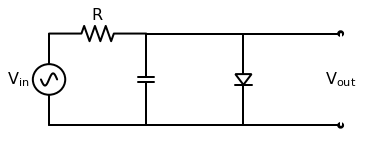

In [ ]:
#@title  schematic
d = schem.Drawing()
d.add(elm.RES, d='right', label='$R$')
C = d.add(elm.CAP, d='down', label='')
d.add(elm.LINE, d='left')
d.add(elm.SOURCE_SIN, d='up', label='$V_{in}$')
d.add(elm.LINE, xy=C.start, d='right')
#d.add(elm.DOT, label='Node')
D = d.add(elm.DIODE, d='down', label='')
d.add(elm.LINE, xy=D.end, d='left')
d.add(elm.LINE, xy=D.end, d='right')
d.add(elm.DOT, label='')
d.add(elm.LINE, xy=D.start, d='right')
d.add(elm.DOT, label='')
d.add(elm.GAP, d='down', label="$V_{out}$")
d.draw()


...and then lots of math...


Then as before, we rewrite the C as a parallel combo of a resistor and a reverse current. 

(Note could you also view this as a LPF slapped on the R-diode rectifier from before...except there are DC offsets...?  ah he just said that in the digital domain is that they're independent effects, whereas in analog modeling they affect each other)


## Double Diode RC Clipper

R & C in series with Vi, and two back to back diodes in parallel with the C. 
Same as previous, can use sinh() instead of exp's. 


fc = 8289.319952702883


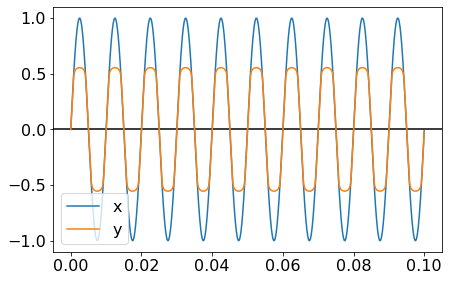

In [ ]:

# Double Diode Clipper with RC LPF Combined NL EQ (sinh)

# Diode Parameters
# Is = 1*10^-6;
# Vt = 26*10^-3;
# eta = 1.68;
eta = 1
Is = 1e-15
Vt = 26e-3

# Diode Parameters Using DK Method
R1 = 240000
C = 80e-12
fc = 1/(2*np.pi*R1*C)
print("fc =",fc)
Fs = 48000
Ts = 1/Fs
R2 = Ts/(2*C)

t = np.arange(0,.1,step=Ts)
Vi = np.sin(2*np.pi*100*t)

# Initialize Output Signal
N = len(Vi)
Vo = np.zeros(N)

x = 0
Vd = 0
thr = 0.0000000001
for n in range(N):
    
    # Step 1: Find voltage across nonlinear componenets
    iter = 1
    num = -Vi[n]/R1 + 2*Is * np.sinh(Vd/(eta*Vt)) + (1/R1 + 1/R2)*Vd - x
    while (iter < 50) and (np.abs(num) > thr):
        
        den = 2*Is/(eta*Vt) * np.cosh(Vd/(eta*Vt)) + (1/R1 + 1/R2)
        Vd = Vd - num/den
        num = -Vi[n]/R1 + 2*Is * np.sinh(Vd/(eta*Vt)) + (1/R1 + 1/R2)*Vd - x
        iter = iter + 1
    
    # Step 2: Calculate Output
    Vo[n] = Vd
    
    # Step 3: Update State Variables
    x = 2/R2*(Vo[n]) - x


# Waveforms
waveform(t,Vi,Vo)


### Signing off for now, 10am Feb 8. 
7am was too early for me, and I didn't sleep well the night before.  I really want to learn to build the plugin in JUCE but I can't keep this up today.

Will fill in more later after the videos are posted.

### Back on, Feb 27
...I'm now reviewing what I missed via the video recordings.

# Tube Screamer Clipping Amplifier Stage

![electrosmash ts clipping amp](https://www.electrosmash.com/images/tech/tube-screamer/tube-screamer-clipping-amplifier.png)

Ignore 4.5V DC bias at the bottom, used to align with 9V battery suuply.

Eric's drawing:

![eric's drawing](https://i.imgur.com/JOCXvOq.png)



Then, since no current flows between $V_{in}$ and + input on op-amp, ignore the C and R in that line.  Thus, the + terminal of op-amp is $V_{in}$, and thus the — terminal is also at $V_{in}$. 

Use trick where you replace two diodes with a single block (use sinh function for current).

Combine 51K R with 500K pot since they're in series: one reistance: 51K to 551 K. 

New image to trace path from $V_{out}$ to ground:

![eric's rotated image](https://i.imgur.com/GyYpEGF.png)

So if voltage across diodes is $V_d$ then output $V_o$ is 

$$ V_o = V_i + V_d$$

Rewrite capacitors as combos of resistors $R_j$ and reverse currents $X_j$ ($j=1,2$), and label all the parts:

![eric's "DK" image](https://i.imgur.com/vqeRUH4.png)

...more math, see his notes, but will try to follow...

Note that voltage-wise,
$$ V_i = V_{R_1} + V_{R_4} $$
and current-wise,
$$ {V_{R_4}\over R_4} = {V_{R_1}\over R_1} - X_1 $$
so
$$ V_i = V_{R_1} + R_4\left( {V_{R_1}\over R_1} - X_1 \right) $$
...

$$ V_o = V_d + V_{in}$$
we'll have to solve for $V_d$ using NR iteration. (Note $V_{R3} = V_d = V_{R2}$ b/c they're in parallel)

$i$ from $V_o$ splits across 4 branches...

$$ i = V_d\left({1\over R_2} + {1\over R_3}\right) - X_2 + 2 I_s \sinh\left({V_d\over\eta V_T}\right) $$

Watch the video for a while, we end up with an expression to solve for via NR iteration:

$$ f(V_d) = {R_1 X_1 - V_i \over R_4 G_4} + V_d\left({1\over R_2} + {1\over R_3}\right) - X_2 + 2 I_s \sinh\left({V_d\over\eta V_T}\right)$$

$$ f'(V_d) = {1\over R_2} + {1\over R_3} + {2 I_s\over \eta V_T} \cosh\left({V_d\over\eta V_T}\right) $$

Solve $f(V_d)=0$ for $V_d$ via NR, then sub into

$$V_o = V_{in} + V_d$$

Then we need to work out our state updates,

$$ X_2[n] = {2\over R_2}V_d - X_2[n-1] $$
and similarly,
$$ X_1[n] = {2\over R_1}V_{R_1} - X_1[n-1] $$
Going back to what we found earlier,

$$ V_i = V_{R_1} + {R_4\over R_1}V_{R_1} - R_4 X_1.$$
Solving for $V_{R_1},$

$$ V_{R_1} = {V_i - R_4 X_1 \over 1 + R_4/R_1}, $$
or setting 
$ G_1 \equiv 1 + R_4/R_1,$

$$ V_{R_1} = {V_i\over G_1} - {R_4\over G_1}X_1 .$$
Plug this in to the expression for $X_1[n]$ above.

$$ X_1[n] = {2\over R_1 G_1}\left( V_i - R_4 X_1[n-1] \right) - X_1[n-1] $$
Using this, and equations for $X_2$, and $f$ and $f'$, we can model the circuit using NR iteration, and put it into MATLAB or Python.
(Eric pasted URL for TubeScreamerClipper into chat, but Vimeo doesn't show the chat, but guessing it's [this one](https://github.com/erictarrbelmont/TSPedal/blob/main/Matlab/a11_TSClipper.m).)

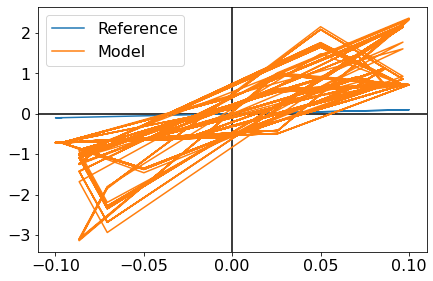

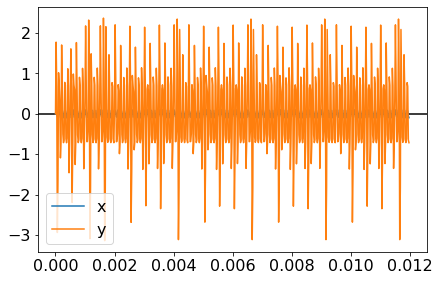

In [ ]:
# TSClipper.m

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#% Tube Screamer Clipping Section

#% Diode Parameters
#% Is = 1*10^-6;
#% Vt = 26*10^-3;
#% eta = 1.68;
eta = 1
Is = 1e-15
Vt = 26e-3

Fs = 48000.0
Ts = 1/Fs
#% Components 
C1 = 47e-9
R1 = Ts/(2*C1)
C2 = 51e-12
R2 = Ts/(2*C2)
pot = 1
P1 = pot*500000
R3 = 51000 + P1
R4 = 4700 #% 47000;

#% Combined Resistances
G1 = (1 + R4/R1)
G4 = (1 + R1/R4)


#% Choose Input Signal
#%Vi = [-1:.001:1].'; % DC Sweep

t = np.arange(0, 0.012, step=Ts) 
Vi = 1*np.sin(2*np.pi*600*t) # first frequency he uses
#Vi = 1*np.sin(2*np.pi*200*t) # he tries this frequency later
Vi = 0.1*np.sin(2*np.pi*10000*t) # higher amplitude gives NaNs


#% Initialize Output Signal
N = len(Vi)
Vo = np.zeros(N)

x1 = 0
x2 = 0
thr = 0.00000000001
Vd = 0
for n in range(N):
    
    #% Step 1: Find voltage across nonlinear componenets
    p = -Vi[n]/(G4*R4) + R1/(G4*R4)*x1 - x2

    iter = 1
    num =  p + Vd/R2 + Vd/R3 + 2*Is * np.sinh(Vd/(eta*Vt))
    while (iter<50 and abs(num) > thr):
        
        den = 2*Is/(eta*Vt) * np.cosh(Vd/(eta*Vt)) + 1/R2 + 1/R3
        Vd = Vd - num/den
        iter = iter + 1
        num =  p + Vd/R2 + Vd/R3 + 2*Is * np.sinh(Vd/(eta*Vt))

  
    #% Step 2: Calculate Output
    Vo[n] = Vd + Vi[n]
    
    #% Step 3: Update State Variables
    x1 = (2/R1)*(Vi[n]/G1 + x1*R4/G1) - x1
    x2 = (2/R2)*(Vd) - x2


#% DC Sweep
char_curve(Vi, Vo)

#% Waveforms
waveform(t, Vi, Vo)

#% THD
#%figure;
#%thd(Vo,Fs);

Because of problems with this method for high frequencies, we introduce the Damped Newton-Rhapson method: take a smaller step if it loops like we're going further away. 

## Damped Newton-Rhapson

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in sinh


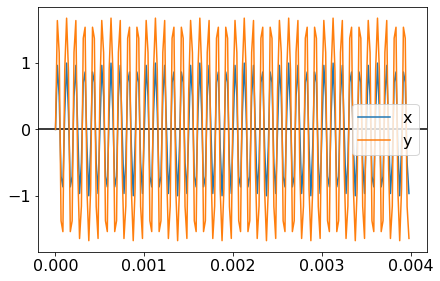

In [ ]:
#%%%%%%%%%%%%%%%% DAMPED Newton-Raphson

#t = [0:Ts:1].'
t = np.arange(0, 0.004, step=Ts)
Vi = 1*np.sin(2*np.pi*400*t)
Vi = 1*np.sin(2*np.pi*10000*t) # this works fine now
#Vi = 1*np.sin(2*np.pi*200*t) # can try lower freq too

#% Initialize Output Signal
N = len(Vi)
Vo = np.zeros(N)

x1 = 0
x2 = 0
x3 = 0
thr = 0.000000001
Vd = 0
for n in range(N): 
    
    #% Step 1: Find voltage across nonlinear componenets
    p = -Vi[n]/(G4*R4) + R1/(G4*R4)*x1 - x2

    iter = 1
    b = 1                       # b is the damping parameter
    fd =  p + Vd/R2 + Vd/R3 + 2*Is * np.sinh(Vd/(eta*Vt));
    while (iter<50 and abs(fd) > thr):
        
        den = 2*Is/(eta*Vt) * np.cosh(Vd/(eta*Vt)) + 1/R2 + 1/R3
        Vnew = Vd - b*fd/den    # b is the damping parameter
        fn = p + Vnew/R2 + Vnew/R3 + 2*Is * np.sinh(Vnew/(eta*Vt))
        if (abs(fn) > abs(fd)): # if we've gone further from zero
            b = b/2             # shrink the step size and try again
        else:                   # normal operation
            Vd = Vnew           # update Vd and move on to next iteration
            b = 1               # reset the step size 

        fd =  p + Vd/R2 + Vd/R3 + 2*Is * np.sinh(Vd/(eta*Vt))
        iter = iter + 1

    
    #% Step 2: Calculate Output
    Vo[n] = Vd + Vi[n]
    
    #% Step 3: Update State Variables
    x1 = (2/R1)*(Vi[n]/G1 + x1*R4/G1) - x1
    x2 = (2/R2)*(Vd) - x2


#% Waveforms
waveform(t, Vi, Vo )

# We'll orange everywhere, meaning output stays well defined

# End of Session 9 
Next up: JUCE!  See https://github.com/erictarrbelmont/TSPedal

(Can use the "CompletedPlugin" branch if you just want to build it immediately.)

# End of Python & Colab, the rest of workshop uses C++. 